In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

In [2]:
import numpy as np
import pandas as pd 
import re

In [3]:
df = pd.read_csv('./data/final_dataset_clean.csv')
# df = pd.read_csv('./data/final_dataset.csv')
# df = pd.read_csv('./data/final_dataset.csv', usecols=['review'])

In [4]:
def invalidity_clear(text):
    text = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", '', text)
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"<.*?>", ' ', text)
    text = re.sub(r"[^\u0000-\u007F]+?", " ", text)
    text = text.lower()
    text = text.strip()
    text 
    return text

In [5]:
def lemmatizer(text):
      stop_words=set(nltk.corpus.stopwords.words('english'))
      word_tokenize=nltk.tokenize.word_tokenize
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(text)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text


In [6]:
df.dropna(inplace=True)
df.head()

,review
0,usual delayed blame someone inability incapac...
1,fantastic today cabin crew seat zone best exp...
2,couldnt book online arrived check find bumped ...
3,london heathrow mumbai boeing business class l...
4,keflav iceland london heathrow business class ...


In [7]:
def clean_text(text):
    text = invalidity_clear(text)
    text = lemmatizer(text)
    print("Cleaned, tokenized and lemmatized:", text)
    return text

Document length analysis


In [8]:
count_array = np.array([])
for entry in df['review']:
    count_array = np.append(count_array, len(entry.split()))

In [9]:
def details(count_array):
    print("mean:", count_array.mean())
    print("std:", count_array.std())
    print("max:", count_array.max())
    print("min:", count_array.min())
    print("median:", np.median(count_array))
    print("25th percentile:", np.percentile(count_array, 25))
    print("50th percentile:", np.percentile(count_array, 50))
    print("75th percentile:", np.percentile(count_array, 75))
details(count_array)

mean: 15.737291199652903
std: 25.49295027213182
max: 642.0
min: 1.0
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


In [10]:
indices = np.where(count_array < 10)[0]
len(indices)
df.reset_index(drop=True, inplace=True)
details(np.array([len(entry.split()) for entry in df['review']]))

mean: 15.737291199652903
std: 25.49295027213182
max: 642
min: 1
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


<Axes: ylabel='count'>

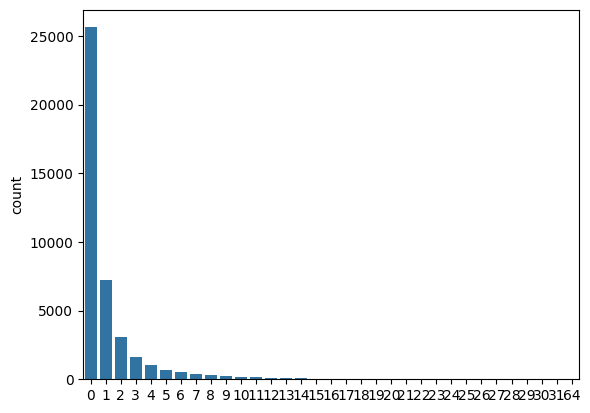

In [11]:
import seaborn as sns
labels = pd.cut(count_array, bins=range(0, int(max(count_array))+10, 10), labels=False)
sns.countplot(x=labels)

In [12]:
df.dropna(inplace=True)

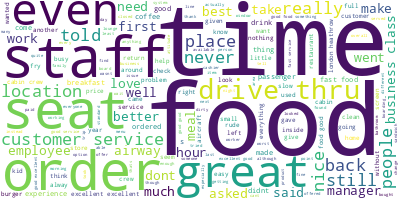

In [13]:
from wordcloud import WordCloud
long_string = ','.join(list(df['review']))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [14]:
import gensim as gs 

def get_corpus(df):
    corpus=[]
    for i in range(len(df)):
        corpus.append(df.iloc[i].split())
    return corpus
processed = get_corpus(df['review'])
dictionary = gs.corpora.Dictionary(processed)

In [15]:
count = 0
for k in dictionary.iteritems():
    print(k)
    count += 1
    if count > 10:
        break

(0, 'blame')
(1, 'delayed')
(2, 'delivering')
(3, 'demand')
(4, 'dont')
(5, 'enough')
(6, 'fulfil')
(7, 'hire')
(8, 'inability')
(9, 'incapacity')
(10, 'personnel')


In [16]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [17]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [18]:
bow_doc_69 = bow_corpus[69]

for i in range(len(bow_doc_69)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_69[i][0], 
                                                     dictionary[bow_doc_69[i][0]], 
                                                     bow_doc_69[i][1]))

Word 4 ("dont") appears 1 time.
Word 13 ("although") appears 1 time.
Word 18 ("cabin") appears 1 time.
Word 22 ("could") appears 1 time.
Word 25 ("crew") appears 1 time.
Word 41 ("food") appears 1 time.
Word 52 ("nice") appears 1 time.
Word 54 ("offering") appears 1 time.
Word 59 ("really") appears 1 time.
Word 63 ("seat") appears 1 time.
Word 73 ("time") appears 2 time.
Word 75 ("without") appears 1 time.
Word 94 ("rest") appears 2 time.
Word 117 ("lounge") appears 1 time.
Word 129 ("service") appears 2 time.
Word 140 ("even") appears 2 time.
Word 142 ("extra") appears 1 time.
Word 151 ("long") appears 1 time.
Word 153 ("made") appears 1 time.
Word 174 ("anything") appears 1 time.
Word 201 ("customer") appears 1 time.
Word 206 ("downhill") appears 1 time.
Word 231 ("happened") appears 1 time.
Word 251 ("never") appears 1 time.
Word 277 ("said") appears 1 time.
Word 307 ("word") appears 1 time.
Word 308 ("work") appears 1 time.
Word 346 ("last") appears 1 time.
Word 477 ("help") appear

In [19]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [20]:
corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf[69]

[(4, 0.06548410051556788),
 (13, 0.0936182368607433),
 (18, 0.07294211363100823),
 (22, 0.06826806733244296),
 (25, 0.06895188252980236),
 (41, 0.03439304495561927),
 (52, 0.06301503702541025),
 (54, 0.11041196761111405),
 (59, 0.06603553640340355),
 (63, 0.06300495276929197),
 (73, 0.09149928768910379),
 (75, 0.08400330467979758),
 (94, 0.20737343068667746),
 (117, 0.08667591553311711),
 (129, 0.07123414930308308),
 (140, 0.12087160096389163),
 (142, 0.08603535198760773),
 (151, 0.06579250729652196),
 (153, 0.07434426160872927),
 (174, 0.09028109935659528),
 (201, 0.057780736388325794),
 (206, 0.14397865072767763),
 (231, 0.10920642685739694),
 (251, 0.06614055514952423),
 (277, 0.07533364600700533),
 (307, 0.11606998271104463),
 (308, 0.06971397084722776),
 (346, 0.08138915668116309),
 (477, 0.08714567261900608),
 (502, 0.061441205011212995),
 (575, 0.08205022411415269),
 (604, 0.0759205700368657),
 (630, 0.08775612376734386),
 (650, 0.08384022741423908),
 (694, 0.12844217605224187),

In [21]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(13, 2),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1)],
 [(11, 2),
  (23, 1),
  (63, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 

In [22]:
lda_model = gs.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes = 20, workers=18)

In [23]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(topic, idx))
    print("\n")

Topic: 0.016*"service" + 0.016*"crew" + 0.015*"time" + 0.012*"heathrow" + 0.012*"good" + 0.011*"london" + 0.011*"cabin" + 0.011*"food" + 0.010*"airway" + 0.009*"boarding" 
Words: 0


Topic: 0.016*"customer" + 0.012*"would" + 0.012*"hour" + 0.012*"told" + 0.011*"airway" + 0.011*"service" + 0.009*"call" + 0.008*"refund" + 0.008*"booked" + 0.008*"could" 
Words: 1


Topic: 0.018*"hour" + 0.011*"would" + 0.011*"london" + 0.011*"time" + 0.010*"back" + 0.009*"staff" + 0.009*"customer" + 0.009*"service" + 0.008*"never" + 0.007*"even" 
Words: 2


Topic: 0.039*"seat" + 0.017*"class" + 0.013*"business" + 0.013*"cabin" + 0.013*"economy" + 0.012*"food" + 0.011*"service" + 0.010*"crew" + 0.008*"airway" + 0.008*"good" 
Words: 3


Topic: 0.014*"london" + 0.013*"neutral" + 0.013*"check" + 0.012*"seat" + 0.012*"staff" + 0.012*"boarding" + 0.011*"airway" + 0.009*"hour" + 0.008*"passenger" + 0.008*"gate" 
Words: 4


Topic: 0.027*"order" + 0.020*"food" + 0.015*"drive" + 0.011*"minute" + 0.010*"place" + 0.0

In [24]:

lda_model_tfidf = gs.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 10, 
                                       workers=18)

In [25]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.247*"good" + 0.046*"s" + 0.031*"nice" + 0.027*"service" + 0.026*"food" + 0.012*"place" + 0.010*"clean" + 0.010*"always" + 0.010*"breakfast" + 0.007*"cool"


Topic: 1 Word: 0.321*"excellent" + 0.010*"clean" + 0.010*"service" + 0.009*"delicious" + 0.008*"open" + 0.007*"perfect" + 0.006*"restaurant" + 0.006*"friendly" + 0.006*"food" + 0.006*"fast"


Topic: 2 Word: 0.011*"love" + 0.009*"good" + 0.008*"okay" + 0.008*"easy" + 0.007*"great" + 0.007*"attention" + 0.007*"price" + 0.006*"This" + 0.006*"Great" + 0.006*"food"


Topic: 3 Word: 0.055*"great" + 0.020*"service" + 0.014*"food" + 0.011*"people" + 0.011*"place" + 0.010*"clean" + 0.010*"location" + 0.010*"awesome" + 0.009*"customer" + 0.009*"nice"


Topic: 4 Word: 0.034*"poor" + 0.024*"place" + 0.017*"worst" + 0.014*"clean" + 0.013*"service" + 0.012*"ever" + 0.012*"long" + 0.009*"super" + 0.009*"burger" + 0.009*"nice"


Topic: 5 Word: 0.016*"slow" + 0.008*"service" + 0.007*"seat" + 0.006*"food" + 0.005*"time" + 0.004*"cre

In [26]:
document_num = 5

for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9700352549552917	 
Topic: 0.016*"customer" + 0.012*"would" + 0.012*"hour" + 0.012*"told" + 0.011*"airway" + 0.011*"service" + 0.009*"call" + 0.008*"refund" + 0.008*"booked" + 0.008*"could"

Score: 0.02672393061220646	 
Topic: 0.039*"seat" + 0.017*"class" + 0.013*"business" + 0.013*"cabin" + 0.013*"economy" + 0.012*"food" + 0.011*"service" + 0.010*"crew" + 0.008*"airway" + 0.008*"good"


In [27]:
# import pickle

# with open('./amazondataset/dictionary.pkl', 'rb') as file:
#     dictionary = pickle.load(file)
# with open('./amazondataset/lda_model.pkl', 'rb') as file:
#     lda_model = pickle.load(file)
# with open('./amazondataset/lda_model_tfidf.pkl', 'rb') as file:
#     lda_model_tfidf = pickle.load(file)
# with open('./amazondataset/bow_corpus.pkl', 'rb') as file:
#     bow_corpus = pickle.load(file)
# with open('./amazondataset/corpus_tfidf.pkl', 'rb') as file:
#     corpus_tfidf = pickle.load(file)
# with open('./amazondataset/tfidf.pkl', 'rb') as file:
#     tfidf = pickle.load(file)

In [28]:
unseen_document = "The coffee tasted very bad and the packaging was horrible" 
def breaker(text):
    return text.split()
bow_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
print(bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
        print(lda_model.print_topic(index, 1))

Cleaned, tokenized and lemmatized: coffee tasted packaging horrible
[(650, 1), (1994, 1), (2094, 1), (4940, 1)]
0.018*"time"
0.058*"service"
0.027*"order"
0.014*"london"
0.018*"hour"
0.041*"excellent"
0.039*"seat"
0.016*"customer"
0.016*"service"
0.035*"love"


In [29]:
unseen_document = "Exposed brick walls, sleek metal accents, and minimalist furniture give this coffee shop a modern edge. Sunlight streams through large windows, illuminating tables occupied by creative entrepreneurs and fashion-forward students. The air buzzes with conversation and the rhythmic clatter of the espresso machine."
def breaker(text):
    return text.split()
new_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
new_vector = tfidf[new_vector]

for index, score in sorted(lda_model_tfidf[new_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}    Topic: {}".format(score, lda_model.print_topic(index, 5)))

Cleaned, tokenized and lemmatized: exposed brick wall sleek metal accent minimalist furniture give coffee shop modern edge sunlight stream large window illuminating table occupied creative entrepreneur fashionforward student buzz conversation rhythmic clatter espresso machine
Score: 0.36027365922927856    Topic: 0.027*"order" + 0.020*"food" + 0.015*"drive" + 0.011*"minute" + 0.010*"place"
Score: 0.23148126900196075    Topic: 0.018*"hour" + 0.011*"would" + 0.011*"london" + 0.011*"time" + 0.010*"back"
Score: 0.15641416609287262    Topic: 0.041*"excellent" + 0.019*"good" + 0.014*"meal" + 0.014*"food" + 0.014*"service"
Score: 0.1376965343952179    Topic: 0.016*"customer" + 0.012*"would" + 0.012*"hour" + 0.012*"told" + 0.011*"airway"
Score: 0.019087769091129303    Topic: 0.018*"time" + 0.017*"fry" + 0.014*"order" + 0.013*"coffee" + 0.013*"chicken"
Score: 0.019029337912797928    Topic: 0.016*"service" + 0.016*"crew" + 0.015*"time" + 0.012*"heathrow" + 0.012*"good"
Score: 0.019014880061149597